In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from datetime import datetime, timedelta
import time

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import seaborn as sns

In [2]:
df = pd.read_csv('./dataset.csv')
df.head()

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,door_actuator,light_switch,timestamp,environment_temperature,environment_lux,label
0,28.000000,68.000000,1.000000,1,1,1,1,1,1,1.685958e+09,23,500,0
1,27.599886,66.896156,475.000000,1,1,1,1,1,1,1.685958e+09,23,500,0
2,27.302920,66.330430,475.000000,1,1,1,1,1,1,1.685958e+09,23,500,0
3,26.716253,65.453923,475.090468,1,1,1,1,1,1,1.685958e+09,23,500,0
4,26.633048,65.095657,475.897761,1,1,1,1,1,1,1.685958e+09,23,500,0


In [3]:
print(f'Lines: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Lines: 8401
Columns: 13


In [4]:
y = df['label']
df['label'].value_counts()

label
0    4201
1    1400
2    1400
3    1400
Name: count, dtype: int64

In [5]:
x_dataset = df[['temperature', 'humidity', 'lux', 'temperature_status', 'humidity_status', 'lux_status', 'climate_switch', 'door_actuator', 'light_switch', 'timestamp', 'environment_temperature', 'environment_lux']]
x_dataset.head()

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,door_actuator,light_switch,timestamp,environment_temperature,environment_lux
0,28.000000,68.000000,1.000000,1,1,1,1,1,1,1.685958e+09,23,500
1,27.599886,66.896156,475.000000,1,1,1,1,1,1,1.685958e+09,23,500
2,27.302920,66.330430,475.000000,1,1,1,1,1,1,1.685958e+09,23,500
3,26.716253,65.453923,475.090468,1,1,1,1,1,1,1.685958e+09,23,500
4,26.633048,65.095657,475.897761,1,1,1,1,1,1,1.685958e+09,23,500


In [6]:
scaler = MinMaxScaler()
x = (x_dataset - x_dataset.min()) / (x_dataset.max() - x_dataset.min())
x = x.fillna(0)
x.head()

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,door_actuator,light_switch,timestamp,environment_temperature,environment_lux
0,0.875274,0.906788,0.002004,1.0,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0
1,0.862766,0.892068,0.951932,1.0,1.0,1.0,1.0,0.0,1.0,0.000119,0.0,0.0
2,0.853483,0.884524,0.951932,1.0,1.0,1.0,1.0,0.0,1.0,0.000238,0.0,0.0
3,0.835144,0.872835,0.952113,1.0,1.0,1.0,1.0,0.0,1.0,0.000357,0.0,0.0
4,0.832543,0.868058,0.953731,1.0,1.0,1.0,1.0,0.0,1.0,0.000476,0.0,0.0


In [7]:
corr = x.corr()
corr

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,door_actuator,light_switch,timestamp,environment_temperature,environment_lux
temperature,1.000000,0.878024,0.055246,0.355217,0.355217,0.355217,0.347639,NaN,0.340244,-0.824055,NaN,NaN
humidity,0.878024,1.000000,0.240484,-0.115618,0.405794,0.405794,0.402186,NaN,0.398403,-0.791004,NaN,NaN
lux,0.055246,0.240484,1.000000,-0.276708,-0.270142,0.448327,-0.266376,NaN,0.376448,-0.342808,NaN,NaN
temperature_status,0.355217,-0.115618,-0.276708,1.000000,-0.090897,-0.090897,-0.090897,NaN,-0.090897,-0.130596,NaN,NaN
humidity_status,0.355217,0.405794,-0.270142,-0.090897,1.000000,-0.090897,-0.090897,NaN,-0.090897,-0.217619,NaN,NaN
lux_status,0.355217,0.405794,0.448327,-0.090897,-0.090897,1.000000,-0.090897,NaN,-0.090897,-0.304642,NaN,NaN
climate_switch,0.347639,0.402186,-0.266376,-0.090897,-0.090897,-0.090897,1.000000,NaN,-0.090897,-0.391665,NaN,NaN
door_actuator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
light_switch,0.340244,0.398403,0.376448,-0.090897,-0.090897,-0.090897,-0.090897,NaN,1.000000,-0.478688,NaN,NaN
timestamp,-0.824055,-0.791004,-0.342808,-0.130596,-0.217619,-0.304642,-0.391665,NaN,-0.478688,1.000000,NaN,NaN


Text(0.5, 1.05, 'Corelação de Recursos')

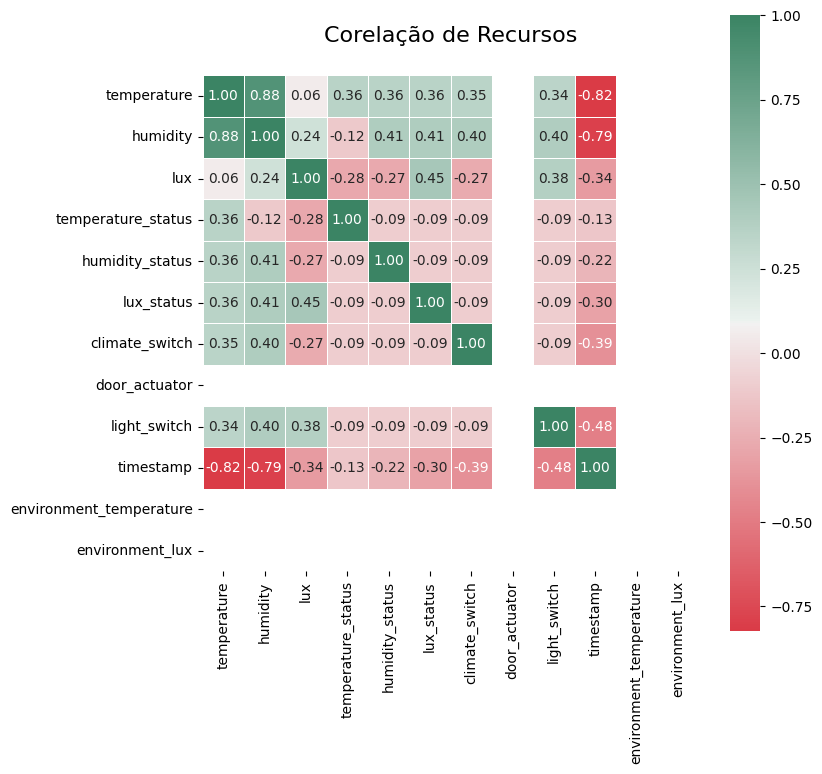

In [8]:
corr = x.corr()
colormap = sns.diverging_palette(10, 150, as_cmap = True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            cmap = colormap, linewidths=0.5, linecolor='white')
plt.title('Corelação de Recursos', y=1.05, size=16)

In [9]:
# Seperação dos dados em teino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(f'Treinamento: {x_train.shape[0]}  ---  {(x_train.shape[0]/x.shape[0])*100:.2f}%')
print(f'Teste: {x_test.shape[0]}  ---  {(x_test.shape[0]/x.shape[0])*100:.2f}%')

Treinamento: 5880  ---  69.99%
Teste: 2521  ---  30.01%


In [10]:
# Obter rótulos das classes
names = ['normal', 'falha_clima', 'falha_ilumincao', 'falha_iluminacao_clima']
classes = [names[i - 1] for i in df['label'].unique()]
index = np.arange(len(classes))
classes

['falha_iluminacao_clima', 'normal', 'falha_clima', 'falha_ilumincao']

# MLP

In [11]:
modelMLP = MLPClassifier(hidden_layer_sizes=(256, 64), activation='logistic', max_iter=1000, random_state=42)
modelMLP.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(256, 64),
              max_iter=1000, random_state=42)

In [12]:
predictsMLP = modelMLP.predict(x_test)

accuracyMLP = accuracy_score(y_test, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y_test, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9908766362554542

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9884    0.9992    0.9938      1281
           1     1.0000    0.9627    0.9810       402
           2     0.9810    1.0000    0.9904       414
           3     1.0000    0.9835    0.9917       424

    accuracy                         0.9909      2521
   macro avg     0.9924    0.9863    0.9892      2521
weighted avg     0.9910    0.9909    0.9908      2521



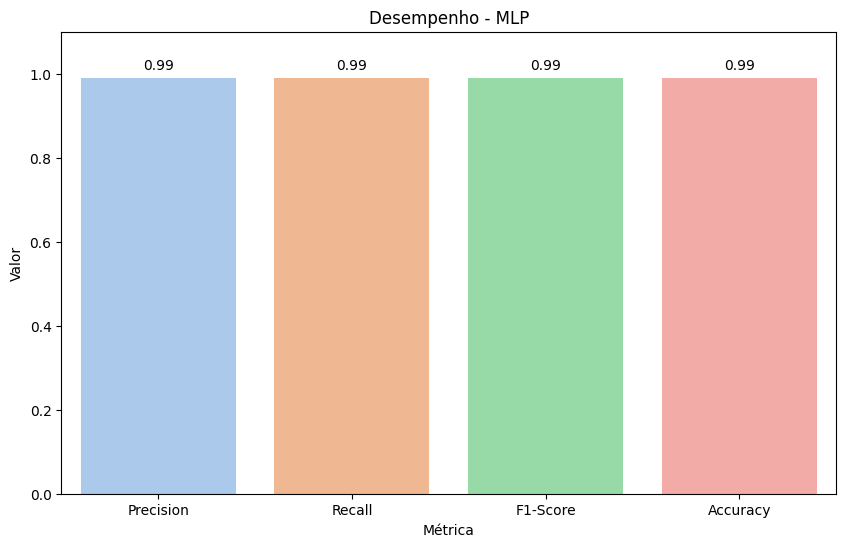

In [13]:
# Calcular as métricas
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

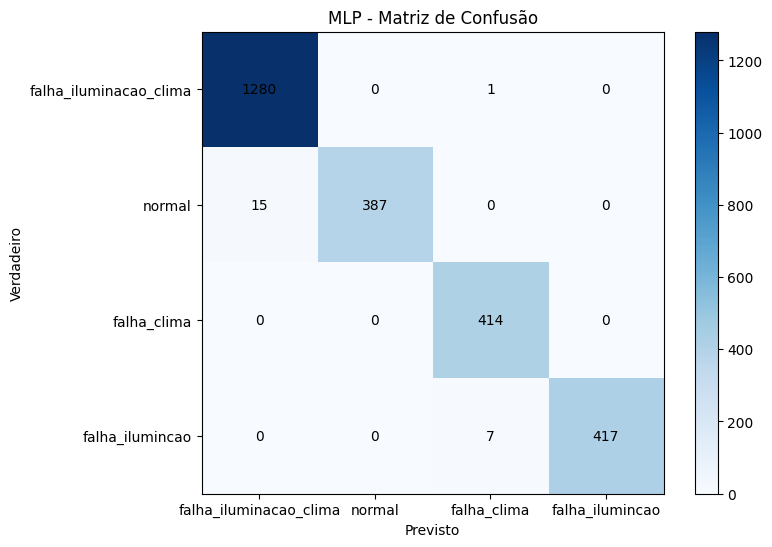

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

# SVM

In [16]:
from sklearn.svm import SVC

# Criar e treinar o classificador SVM
svm = SVC(gamma=0.01, C=100.0)

svm.fit(x_train, y_train)

# Prever os rótulos para os dados de teste
predictsSVM = svm.predict(x_test)

accuracySVM = accuracy_score(y_test, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y_test, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.9484331614438715

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9853    0.9961    0.9907      1281
           1     0.9871    0.9527    0.9696       402
           2     0.9031    0.8333    0.8668       414
           3     0.8487    0.9127    0.8795       424

    accuracy                         0.9484      2521
   macro avg     0.9311    0.9237    0.9267      2521
weighted avg     0.9491    0.9484    0.9483      2521



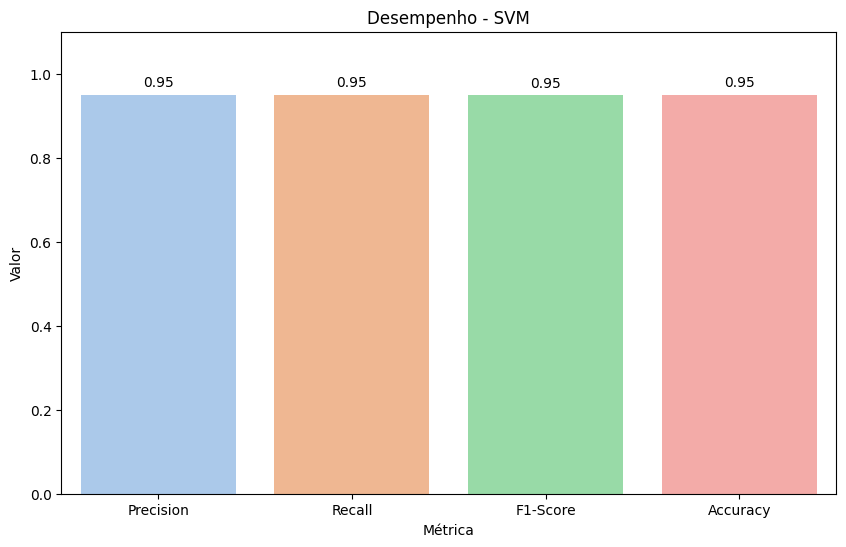

In [17]:
# Calcular as métricas
y_pred = predictsSVM
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

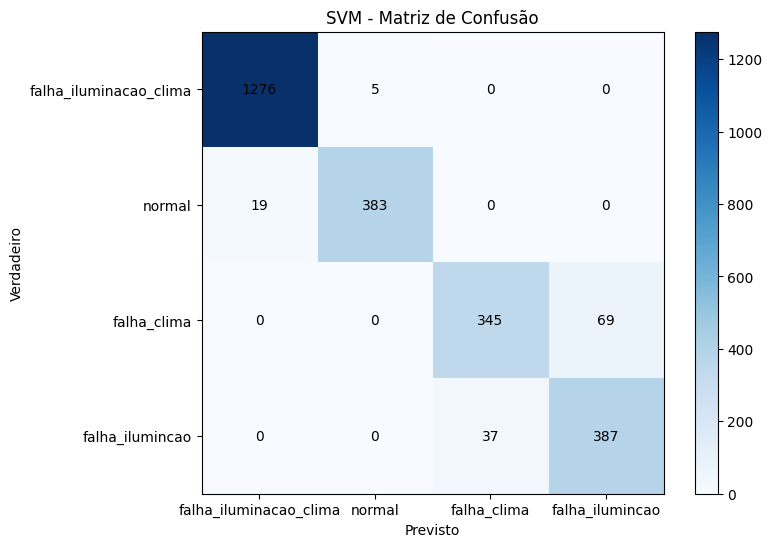

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

# Criar e treinar o classificador NB
nb = GaussianNB()

nb.fit(x_train, y_train)

# Prever os rótulos para os dados de teste
predictsNB = nb.predict(x_test)

accuracyNB = accuracy_score(y_test, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y_test, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.8865529551765172

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    0.8353    0.9103      1281
           1     0.6558    1.0000    0.7921       402
           2     0.9472    0.8671    0.9054       414
           3     0.8802    0.9528    0.9151       424

    accuracy                         0.8866      2521
   macro avg     0.8708    0.9138    0.8807      2521
weighted avg     0.9163    0.8866    0.8914      2521



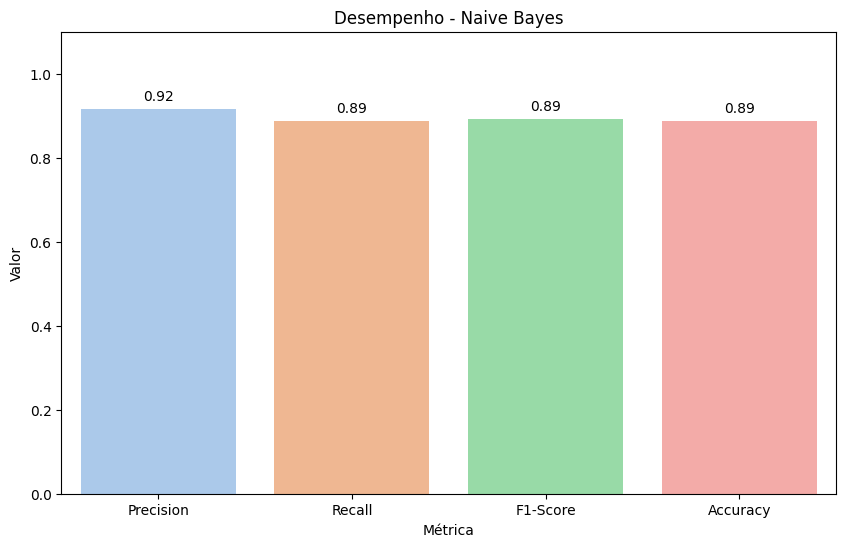

In [22]:
# Calcular as métricas
y_pred = predictsNB
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

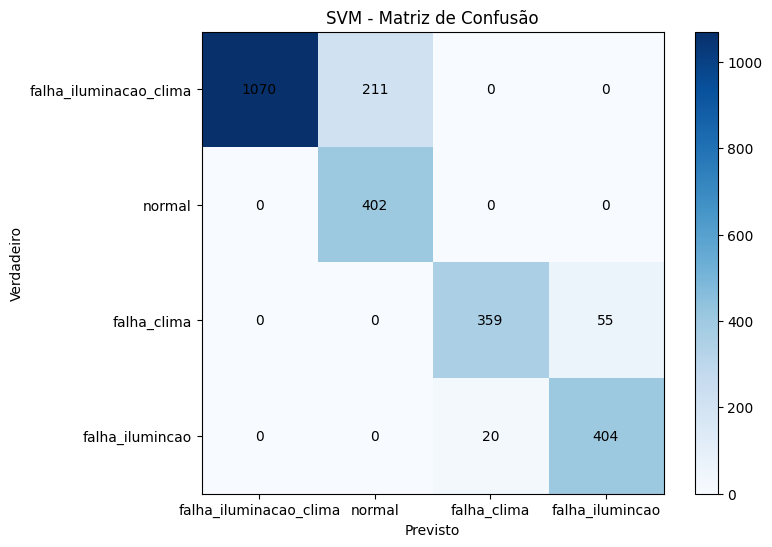

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

# Árvore de Decisão

In [24]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(
  criterion='entropy',
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=None
)

modelDT.fit(x_train, y_train)

predictsDT = modelDT.predict(x_test)

accuracyDT = accuracy_score(y_test, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y_test, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9992066640222134

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1281
           1     1.0000    1.0000    1.0000       402
           2     0.9976    0.9976    0.9976       414
           3     0.9976    0.9976    0.9976       424

    accuracy                         0.9992      2521
   macro avg     0.9988    0.9988    0.9988      2521
weighted avg     0.9992    0.9992    0.9992      2521



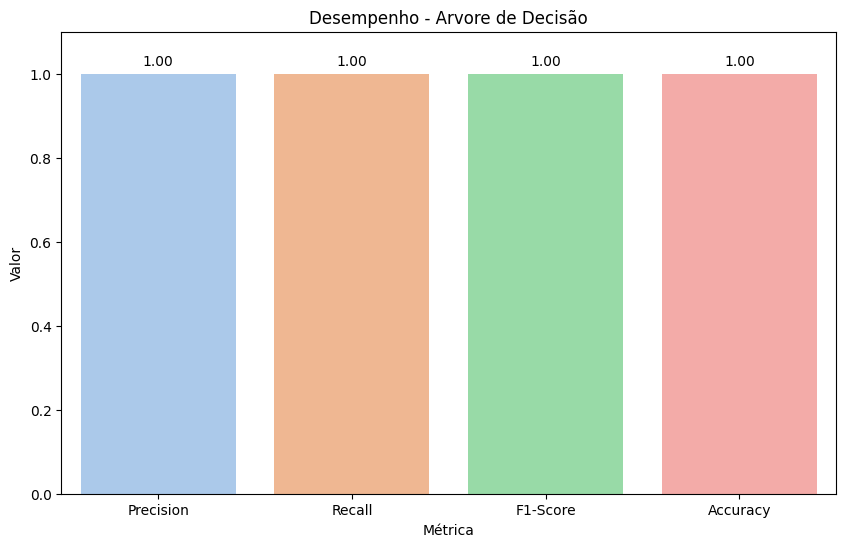

In [26]:
# Calcular as métricas
y_pred = predictsDT
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

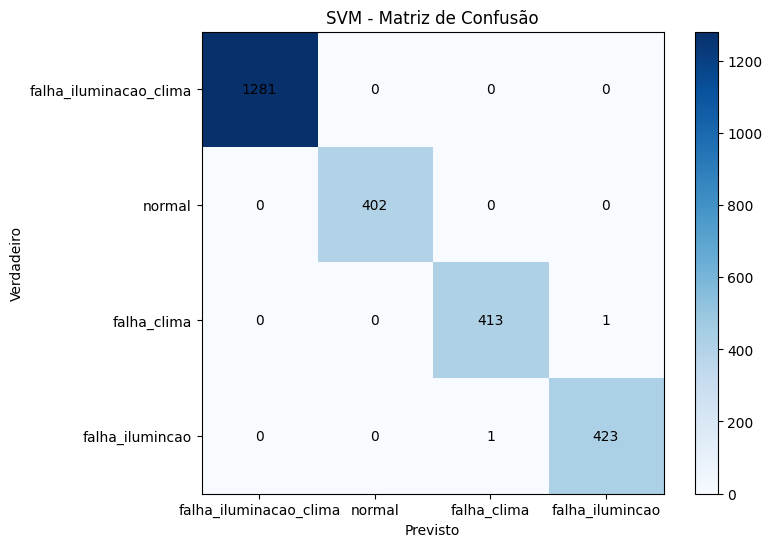

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

# Floresta Aleatória

In [28]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
  n_estimators=100,
  criterion='entropy',
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42
)
modelRF.fit(x_train, y_train)

predictsRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y_test, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9996033320111067

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1281
           1     1.0000    1.0000    1.0000       402
           2     0.9976    1.0000    0.9988       414
           3     1.0000    0.9976    0.9988       424

    accuracy                         0.9996      2521
   macro avg     0.9994    0.9994    0.9994      2521
weighted avg     0.9996    0.9996    0.9996      2521



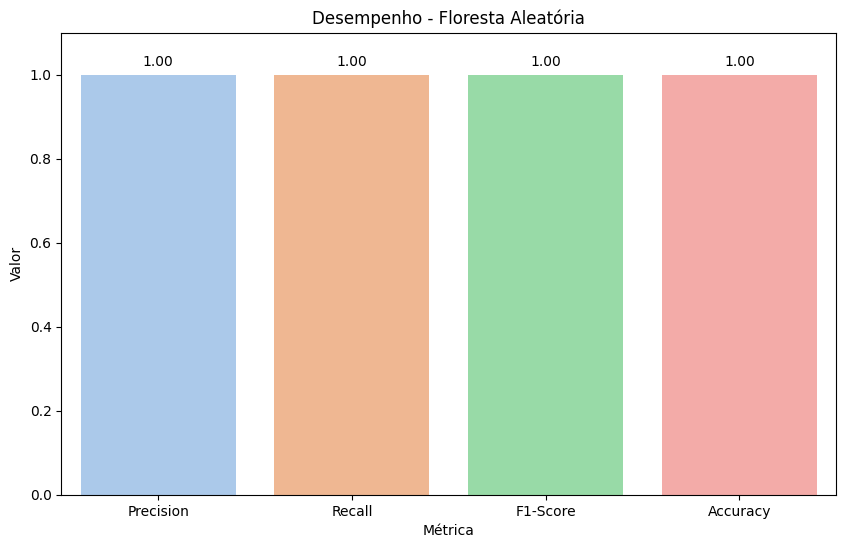

In [31]:
# Calcular as métricas
y_pred = predictsRF
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Floresta Aleatória')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

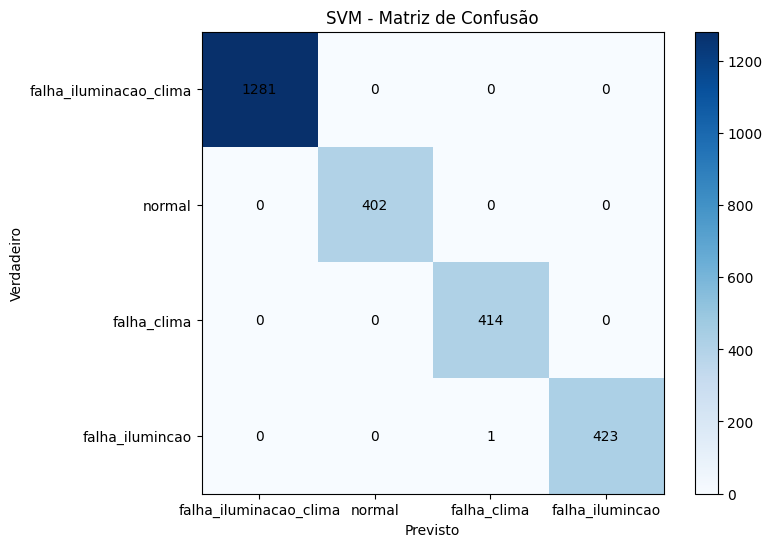

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [33]:
import joblib

joblib.dump(modelRF, './best_ml.joblib')

['./best_ml.joblib']